## This script contains the following:
#### 1. Import Libraries and Data
#### 2. Data Prep
#### 3. The Elbow Technique
#### 4. k-means clustering
#### 5. Descriptive statistics and insights

### 1. Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
os.environ["OMP_NUM_THREADS"] = "6"
#telling the program to use only a specific number of threads to avoid the memory leak issue. 

In [3]:
# Create directory path
path = r'C:\Users\luke_\Documents\FinalProject\02_data'

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
df = pd.read_csv(os.path.join(path, 'prepared_data','happiness_checked.csv'))

In [6]:
df.head()

,year,rank,country_name,region,happiness_score,gdp/capita,social_support,life_expectancy,freedom_of_choice,generosity,perceived_corruption
0,2024,1,Finland,Europe and Central Asia,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,2024,2,Denmark,Europe and Central Asia,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,2024,3,Iceland,Europe and Central Asia,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,2024,4,Sweden,Europe and Central Asia,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,2024,5,Israel,Middle East and North Africa,7.341,1.803,1.513,0.740,0.641,0.153,0.193


### 2. Data Prep

In [7]:
#Create a subset without string values 'country_name' and 'region'. I leave out generosity and percieved corruption as these do not
# fit into our hypothesis.
df_sub = df[['year', 'happiness_score', 'gdp/capita', 'social_support', 'life_expectancy',
                  'freedom_of_choice']]

#### 3. The Elbow Technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\luke_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\luke_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\luke_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\luke_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[-14650.120772372744,
 -5449.151766798563,
 -3771.385780629783,
 -3239.8236957835975,
 -2693.9995316543773,
 -2209.7491195643984,
 -1914.5415349724628,
 -1658.2323535861933,
 -1390.7150500827895]

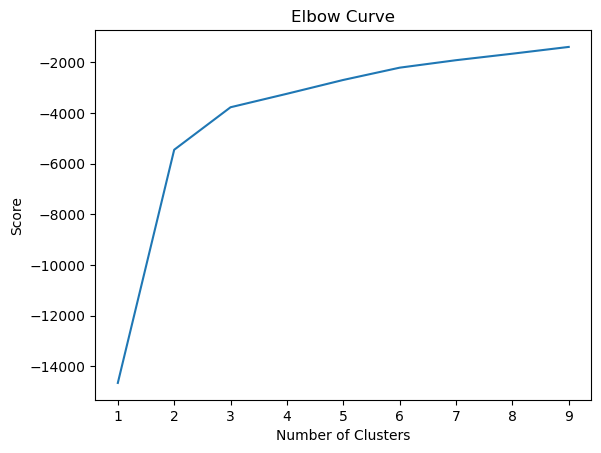

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### After 3 the curve dramaticly straightens. I will continue with 3 clusters.

### 4. k-means clustering

In [11]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [12]:
# Fit the k-means object to the data.
kmeans.fit(df_sub)

C:\Users\luke_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=3)

In [13]:
df_sub.loc[:, 'clusters'] = kmeans.fit_predict(df_sub)

C:\Users\luke_\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\luke_\AppData\Local\Temp\ipykernel_24324\3534891625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[:, 'clusters'] = kmeans.fit_predict(df_sub)


In [14]:
df_sub.head(30)

,year,happiness_score,gdp/capita,social_support,life_expectancy,freedom_of_choice,clusters
0,2024,7.741,1.844,1.572,0.695,0.859,1
1,2024,7.583,1.908,1.520,0.699,0.823,1
2,2024,7.525,1.881,1.617,0.718,0.819,1
3,2024,7.344,1.878,1.501,0.724,0.838,1
4,2024,7.341,1.803,1.513,0.740,0.641,1
5,2024,7.319,1.901,1.462,0.706,0.725,1
6,2024,7.302,1.952,1.517,0.704,0.835,1
7,2024,7.122,2.141,1.355,0.708,0.801,1
8,2024,7.060,1.970,1.425,0.747,0.759,1
9,2024,7.057,1.854,1.461,0.692,0.756,1


In [15]:
df_sub['clusters'].value_counts()

clusters
1    568
0    467
2    462
Name: count, dtype: int64

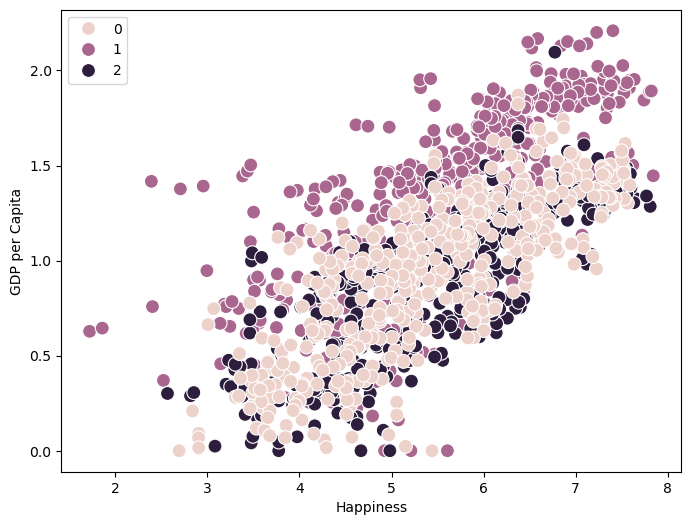

In [16]:
# Plot 'happiness_score' and 'freedom_of_choice'
plt.figure(figsize=(8, 6))

# Scatter plot with k-means cluster labels as hue
ax = sns.scatterplot(x=df_sub['happiness_score'], y=df_sub['gdp/capita'], hue=kmeans.labels_, s=100)

# Removing the grid for a cleaner plot
ax.grid(False)

# Set x and y axis labels
plt.xlabel('Happiness')
plt.ylabel('GDP per Capita')

# Display the plot
plt.show()

### **Plot 1**
#### The clustering of darker points at higher happiness and freedom levels could indicate that individuals in Cluster 2 are a demographic group that provides greater autonomy and general life satisfaction, which supports both freedom of choice and happiness.
#### Conversely, the spread of lighter points across lower ranges of both axes suggests that individuals in Cluster 0 may face more constraints in freedom or report lower overall well-being, resulting in lower happiness scores.

In [17]:
df_sub.dtypes

year                   int64
happiness_score      float64
gdp/capita           float64
social_support       float64
life_expectancy      float64
freedom_of_choice    float64
clusters               int32
dtype: object

In [18]:
df_sub['clusters'] = df_sub['clusters'].astype(object)

C:\Users\luke_\AppData\Local\Temp\ipykernel_24324\649145059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = df_sub['clusters'].astype(object)


In [34]:
#To get a clearer idea of the seperate clusters, I will plt subsets based on the assigned cluster number
sub_cluster_yellow = df_sub[df_sub["clusters"] == 0 ]

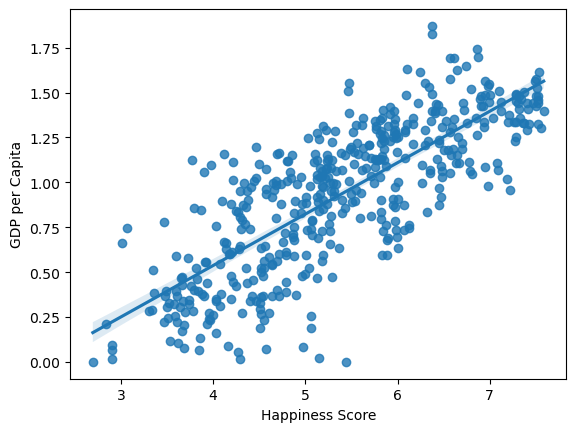

In [35]:
sns.regplot(x="happiness_score", y="gdp/capita", data=sub_cluster0, scatter=True, fit_reg=True)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")
plt.show()

### Plot 1
#### This graph indicates a general positive trend between happiness and freedom of choice, though there is notable variation around this trend. Individuals with similar happiness scores exhibit a wide range of freedom of choice scores, and the confidence interval widens at the extremes, suggesting more variability in the relationship at those points. The densest clustering occurs in the mid-range, where moderate levels of both happiness and freedom of choice are most commonly reported in this dataset.

In [27]:
sub_cluster_purple = df_sub[df_sub["clusters"] == 1]

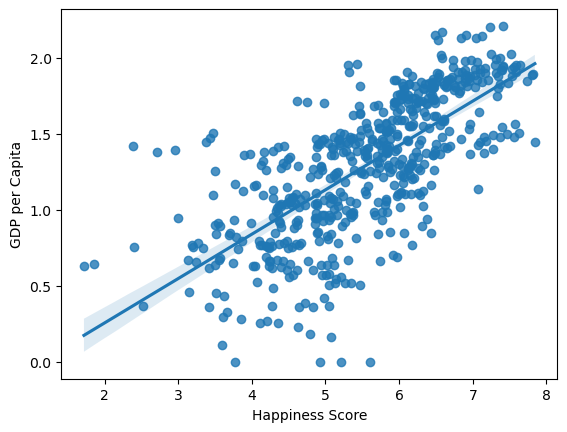

In [28]:
sns.regplot(x="happiness_score", y="gdp/capita", data=sub_cluster_purple, scatter=True, fit_reg=True)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")
plt.show()

### Plot 2
#### The relationship appears to be moderately strong, as points generally follow the upward trend of the line. Most data points cluster around mid-level happiness and freedom of choice, with more variation in freedom of choice at the extremes of the happiness scale. The narrow confidence interval indicates a fairly reliable trend across most of the range, with slightly higher variability at the lowest happiness levels.

In [31]:
sub_cluster_black = df_sub[df_sub["clusters"] == 2]

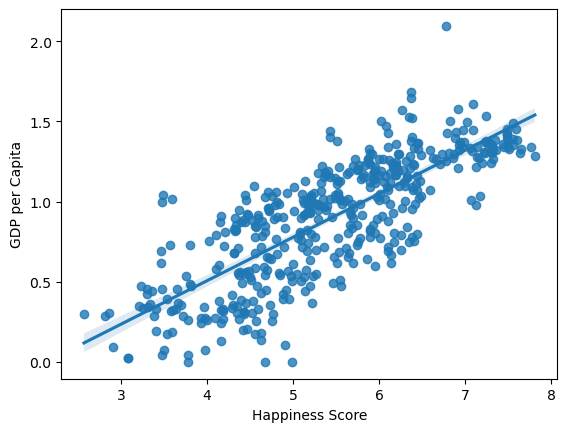

In [33]:
sns.regplot(x="happiness_score", y="gdp/capita", data=sub_cluster_black, scatter=True, fit_reg=True)
plt.xlabel("Happiness Score")
plt.ylabel("GDP per Capita")
plt.show()

### Plot 3
#### There is a dense cluster of data points in the middle of the plot, particularly where happiness scores are between 4 and 6 and freedom of choice scores range from 0.3 to 0.5. This clustering suggests that a large portion of the sample reports mid-level scores for both happiness and freedom of choice. There are fewer points at the extreme ends of both variables, indicating that very high or very low levels of happiness and freedom of choice are less common in this dataset.

## 5. Descriptive statistics and insights

In [26]:
df_sub.loc[df_sub['clusters'] == 2, 'clusters'] = 'black'
df_sub.loc[df_sub['clusters'] == 1, 'clusters'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'clusters'] = 'yellow'

df_sub.groupby('clusters').agg({'happiness_score':['mean', 'median'], 
                         'gdp/capita':['mean', 'median'],
                          'social_support':['mean', 'median'],
                            'life_expectancy':['mean', 'median'],
                               'freedom_of_choice':['mean', 'median']})

happiness_score         gdp/capita         social_support          \
                    mean  median       mean  median           mean  median   
clusters                                                                     
black           5.425506  5.4310   0.893868  0.9485       1.193825  1.2455   
purple          5.548956  5.6895   1.291701  1.3555       0.992044  1.0220   
yellow          5.378452  5.2910   0.931546  0.9960       0.991640  1.0260   

         life_expectancy        freedom_of_choice          
                    mean median              mean  median  
clusters                                                   
black           0.674236  0.723          0.437489  0.4570  
purple          0.502276  0.536          0.543947  0.5625  
yellow          0.582019  0.631          0.403216  0.4220

### Happiness Score:
#### The purple cluster has the highest average and median happiness scores (mean: 5.55, median: 5.69), suggesting that countries in this cluster tend to report higher happiness levels.
#### The black cluster has a slightly lower happiness score (mean: 5.43, median: 5.43), while the yellow cluster reports the lowest happiness score (mean: 5.38, median: 5.29).
#### This suggests that, on average, the purple cluster is associated with higher happiness levels.

### GDP per Capita:
#### The purple cluster again shows the highest average and median GDP per capita (mean: 1.29, median: 1.36), suggesting it comprises wealthier countries relative to the other clusters.
#### The yellow cluster follows, with GDP per capita values slightly lower than the purple cluster (mean: 0.93, median: 0.99).
#### The black cluster has the lowest GDP per capita (mean: 0.89, median: 0.95), indicating that countries in this cluster are generally less wealthy.

### Social Support:
#### The black cluster has the highest social support values (mean: 1.19, median: 1.25), suggesting strong community or family support networks.
#### The purple cluster has a slightly lower social support (mean: 0.99, median: 1.02).
#### The yellow cluster reports the lowest social support (mean: 0.99, median: 1.02), nearly equal to the purple cluster but slightly less than the black cluster.
#### This implies that countries in the black cluster benefit from stronger social networks.

### Life Expectancy:
#### The black cluster has the highest mean and median life expectancy (mean: 0.67, median: 0.72), indicating better health outcomes in these countries.
#### The yellow cluster follows with slightly lower life expectancy values (mean: 0.58, median: 0.63).
#### The purple cluster has the lowest life expectancy (mean: 0.50, median: 0.54), which could suggest poorer health conditions in these countries.
#### Higher life expectancy in the black cluster could contribute to the strong social support, potentially due to better healthcare or social systems.

### Freedom of Choice:
#### The purple cluster shows the highest levels of freedom of choice (mean: 0.54, median: 0.56), suggesting that people in these countries feel they have more personal freedoms.
#### The black cluster shows moderate levels (mean: 0.43, median: 0.46).
#### The yellow cluster has the lowest freedom of choice values (mean: 0.40, median: 0.42), suggesting a more restricted personal freedom compared to the other clusters.

### Summary and Insights

#### The purple cluster appears to represent wealthier countries with high GDP per capita and high freedom of choice, but lower social support and life expectancy.
#### The black cluster includes countries with strong social support and high life expectancy, though they have lower GDP per capita and freedom of choice than the purple cluster.
#### The yellow cluster may include countries with moderate economic performance but lower social support, life expectancy, and freedom of choice compared to the other clusters.

In [43]:
df_sub.to_csv('C:\\Users\\luke_\\Desktop\\purple_regions.csv', index=False)